In [1]:
from nilearn import plotting
import nibabel as nib


aparcaseg = nib.load(
    "/Users/leonmartin_bih/tools/brainimagetools/brainimagetools/brain-atlas-ontology/atlas_archive/MNI_ICBM2009c/label/aparcaseg.nii"
)

print(aparcaseg.shape)

(256, 256, 256)


In [2]:
aparcaseg_mni09c = nib.load(
    "/Users/leonmartin_bih/tools/brainimagetools/brainimagetools/brain-atlas-ontology/atlas_archive/MNI_ICBM2009c/label/aparc+aseg-mni_09c.nii.gz"
)
print(aparcaseg_mni09c.shape)

(193, 229, 193)


In [3]:
aparc2009saseg = nib.load(
    "/Users/leonmartin_bih/tools/brainimagetools/brainimagetools/brain-atlas-ontology/atlas_archive/MNI_ICBM2009c/label/aparc.a2009s+aseg-mni_09c.nii.gz"
)
aparc2009saseg.shape

(193, 229, 193)

In [4]:
import pandas as pd

lut = pd.read_csv(
    "/Users/leonmartin_bih/tools/brainimagetools/FreeSurferColorLUT.txt",
    comment="#",
    sep="\s+",
    header=None,
    names=["ROI_index", "Label", "R", "G", "B", "A"],
)
lut.reset_index(drop=True, inplace=True)
lut

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/var/folders/ym/9kw1g21j1nd7kwfn8c0z3st40000gn/T/ipykernel_48951/320277642.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep="\s+",


,ROI_index,Label,R,G,B,A
0,0,Unknown,0,0,0,0
1,1,Left-Cerebral-Exterior,70,130,180,0
2,2,Left-Cerebral-White-Matter,245,245,245,0
3,3,Left-Cerebral-Cortex,205,62,78,0
4,4,Left-Lateral-Ventricle,120,18,134,0
...,...,...,...,...,...,...
1373,14171,wm_rh_S_suborbital,21,20,60,0
1374,14172,wm_rh_S_subparietal,101,60,60,0
1375,14173,wm_rh_S_temporal_inf,21,180,180,0
1376,14174,wm_rh_S_temporal_sup,223,220,60,0


In [5]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

colors = np.zeros((lut.ROI_index.max() + 1, 4))

In [6]:
for i, r in lut.iterrows():
    colors[r.ROI_index] = np.array([r.R, r.G, r.B, 255]) / 255

In [7]:
np.max(colors)

1.0

In [8]:
lut

,ROI_index,Label,R,G,B,A
0,0,Unknown,0,0,0,0
1,1,Left-Cerebral-Exterior,70,130,180,0
2,2,Left-Cerebral-White-Matter,245,245,245,0
3,3,Left-Cerebral-Cortex,205,62,78,0
4,4,Left-Lateral-Ventricle,120,18,134,0
...,...,...,...,...,...,...
1373,14171,wm_rh_S_suborbital,21,20,60,0
1374,14172,wm_rh_S_subparietal,101,60,60,0
1375,14173,wm_rh_S_temporal_inf,21,180,180,0
1376,14174,wm_rh_S_temporal_sup,223,220,60,0


In [9]:
np.unique(aparcaseg_mni09c.get_fdata().astype(int))

array([   0,    2,    4,    5,    7,    8,   10,   11,   12,   13,   14,
         15,   16,   17,   18,   24,   26,   28,   30,   31,   41,   43,
         44,   46,   47,   49,   50,   51,   52,   53,   54,   58,   60,
         62,   63,   77,   85,  251,  252,  253,  254,  255, 1001, 1002,
       1003, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014,
       1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025,
       1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 2001,
       2002, 2003, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
       2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035])

In [10]:
lut[lut.ROI_index.isin(np.unique(aparcaseg_mni09c.get_fdata().astype(int)))]

,ROI_index,Label,R,G,B,A
0,0,Unknown,0,0,0,0
2,2,Left-Cerebral-White-Matter,245,245,245,0
4,4,Left-Lateral-Ventricle,120,18,134,0
5,5,Left-Inf-Lat-Vent,196,58,250,0
7,7,Left-Cerebellum-White-Matter,220,248,164,0
...,...,...,...,...,...,...
475,2031,ctx-rh-supramarginal,80,160,20,0
476,2032,ctx-rh-frontalpole,100,0,100,0
477,2033,ctx-rh-temporalpole,70,70,70,0
478,2034,ctx-rh-transversetemporal,150,150,200,0


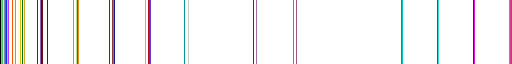

In [11]:
ListedColormap(colors)

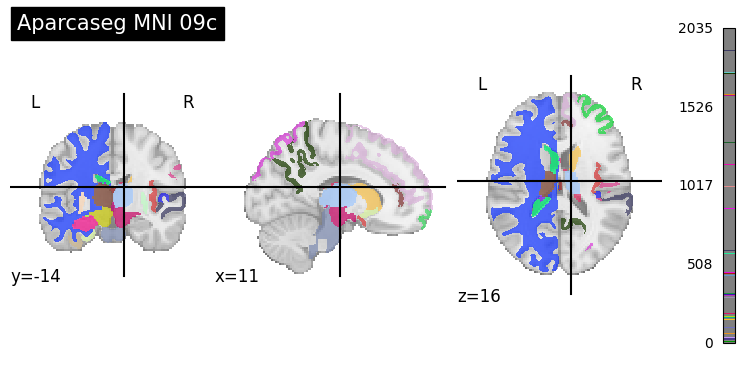

In [12]:
plotting.plot_roi(
    aparcaseg_mni09c,
    cmap=ListedColormap(colors),
    title="Aparcaseg MNI 09c",
    colorbar=True,
)

In [13]:
from nilearn.plotting import find_parcellation_cut_coords
from matplotlib.colors import to_hex

centers, labels = find_parcellation_cut_coords(
    aparcaseg_mni09c, return_label_names=True
)

In [14]:
fs86 = np.loadtxt("/Users/leonmartin_bih/tools/brainimagetools/brainimagetools/niprocessingtools/niprocessingtools/data/FS86_labels.txt", dtype=str)
fs86

array(['ctx-lh-bankssts', 'ctx-lh-caudalanteriorcingulate',
       'ctx-lh-caudalmiddlefrontal', 'ctx-lh-cuneus', 'ctx-lh-entorhinal',
       'ctx-lh-frontalpole', 'ctx-lh-fusiform', 'ctx-lh-inferiorparietal',
       'ctx-lh-inferiortemporal', 'ctx-lh-insula',
       'ctx-lh-isthmuscingulate', 'ctx-lh-lateraloccipital',
       'ctx-lh-lateralorbitofrontal', 'ctx-lh-lingual',
       'ctx-lh-medialorbitofrontal', 'ctx-lh-middletemporal',
       'ctx-lh-paracentral', 'ctx-lh-parahippocampal',
       'ctx-lh-parsopercularis', 'ctx-lh-parsorbitalis',
       'ctx-lh-parstriangularis', 'ctx-lh-pericalcarine',
       'ctx-lh-postcentral', 'ctx-lh-posteriorcingulate',
       'ctx-lh-precentral', 'ctx-lh-precuneus',
       'ctx-lh-rostralanteriorcingulate', 'ctx-lh-rostralmiddlefrontal',
       'ctx-lh-superiorfrontal', 'ctx-lh-superiorparietal',
       'ctx-lh-superiortemporal', 'ctx-lh-supramarginal',
       'ctx-lh-temporalpole', 'ctx-lh-transversetemporal',
       'left-accumbens-area', 'lef

In [15]:
dk_centers = dict()
dk_colors = list()
dk_coords = list()
for c, l in zip(centers, labels):
    r = lut.loc[lut.ROI_index == l, :]
    rgba = np.array([r.R.item(), r.G.item(), r.B.item(), 255]) / 255
    hex_color = to_hex(rgba)

    label = lut[lut.ROI_index == l].Label.values[0]
    if label.lower() in fs86:
        dk_coords.append(c)
        dk_centers[label] = {
            "ROI_index": str(l),
            "x": c[0],
            "y": c[1],
            "z": c[2],
            "color": hex_color,
        }
        dk_colors.append(hex_color)

In [16]:
import json

with open("aparcaseg_mni09c_centers.json", "w") as f:
    json.dump(dk_centers, f)
dk_centers

{'Left-Cerebellum-Cortex': {'ROI_index': '8',
  'x': -24.40642428142428,
  'y': -61.91204150579151,
  'z': -36.62557646932647,
  'color': '#e69422'},
 'Left-Thalamus': {'ROI_index': '10',
  'x': -11.500183217295714,
  'y': -18.458226456577506,
  'z': 7.141168926346651,
  'color': '#00760e'},
 'Left-Caudate': {'ROI_index': '11',
  'x': -12.735150095805835,
  'y': 10.40195869704067,
  'z': 9.836491377474985,
  'color': '#7abadc'},
 'Left-Putamen': {'ROI_index': '12',
  'x': -25.96036489462095,
  'y': 1.3513683548285655,
  'z': 0.1748977665932614,
  'color': '#ec0db0'},
 'Left-Pallidum': {'ROI_index': '13',
  'x': -20.477836213373408,
  'y': -4.457926371149512,
  'z': -0.817430503380919,
  'color': '#0c30ff'},
 'Left-Hippocampus': {'ROI_index': '17',
  'x': -25.205718041406513,
  'y': -21.822543542556687,
  'z': -13.643608281301354,
  'color': '#dcd814'},
 'Left-Amygdala': {'ROI_index': '18',
  'x': -22.85378973105135,
  'y': -4.4596577017114925,
  'z': -19.27041564792176,
  'color': '#67

In [17]:
len(dk_centers)

86

In [18]:
for l in labels:
    r = lut.loc[lut.ROI_index == l, :]
    rgba = np.array([r.R.item(), r.G.item(), r.B.item(), 255]) / 255

In [19]:
rgba

array([1.        , 0.75294118, 0.1254902 , 1.        ])

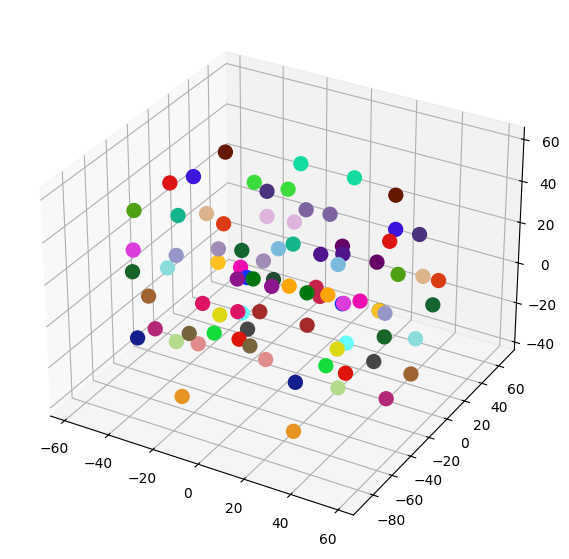

In [20]:
dk_coords = np.array(dk_coords)
fig = plt.figure(figsize=(10, 7))  # Create a figure
ax = fig.add_subplot(111, projection="3d")  # Add a 3D subplot
ax.scatter(
    dk_coords[:, 0],
    dk_coords[:, 1],
    dk_coords[:, 2],
    c=dk_colors,
    marker="o",
    alpha=1,
    s=100,
)

plt.show()

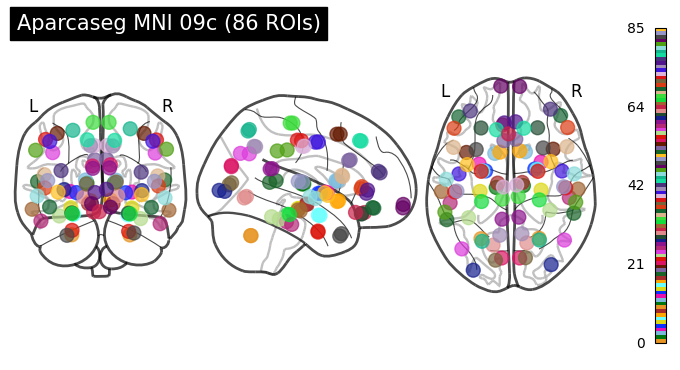

In [21]:
plotting.plot_markers(
    node_values=np.arange(len(dk_coords)),
    node_coords=dk_coords,
    title="Aparcaseg MNI 09c (86 ROIs)",
    colorbar=True,
    node_cmap=ListedColormap(dk_colors),
)